In [1]:
from Binaries import *

In [2]:
triggers = np.loadtxt("/cr/tempdata01/filip/iRODS/temp/triggers.csv", dtype = str)

In [3]:
stations, counts = np.unique(triggers, return_counts = True)
stations_int = [int(station[-8:-4]) for station in stations]
single_trace_duration = GLOBAL.single_bin_duration * GLOBAL.n_bins
rates, sigma_rates = [], []

for i, station in enumerate(stations_int):
    Buffer = RandomTrace(index = station - 1)
    all_traces = len(Buffer._these_traces)
    all_traces_duration = all_traces * single_trace_duration
    rate_error = np.sqrt(counts[i]) / all_traces_duration
    rate = counts[i] / all_traces_duration

    print(stations[i], counts[i], all_traces, rate, rate_error)

    sigma_rates.append(rate_error)
    rates.append(rate)

[INFO] -- LOADING RANDOMS: nuria_randoms0001.csv                    
nuria_randoms0001.csv 4 10000 23.531626506024097 11.765813253012048
[INFO] -- LOADING RANDOMS: nuria_randoms0002.csv                    
nuria_randoms0002.csv 2 10000 11.765813253012048 8.319686337379371
[INFO] -- LOADING RANDOMS: nuria_randoms0003.csv                    
nuria_randoms0003.csv 6 10000 35.297439759036145 14.410119439377693
[INFO] -- LOADING RANDOMS: nuria_randoms0004.csv                    
nuria_randoms0004.csv 2 10000 11.765813253012048 8.319686337379371
[INFO] -- LOADING RANDOMS: nuria_randoms0005.csv                    
nuria_randoms0005.csv 2 10000 11.765813253012048 8.319686337379371
[INFO] -- LOADING RANDOMS: nuria_randoms0008.csv                    
nuria_randoms0008.csv 2 10000 11.765813253012048 8.319686337379371
[INFO] -- LOADING RANDOMS: nuria_randoms0009.csv                    
nuria_randoms0009.csv 2 10000 11.765813253012048 8.319686337379371
[INFO] -- LOADING RANDOMS: nuria_randoms0010.c

KeyboardInterrupt: 

KeyboardInterrupt: 

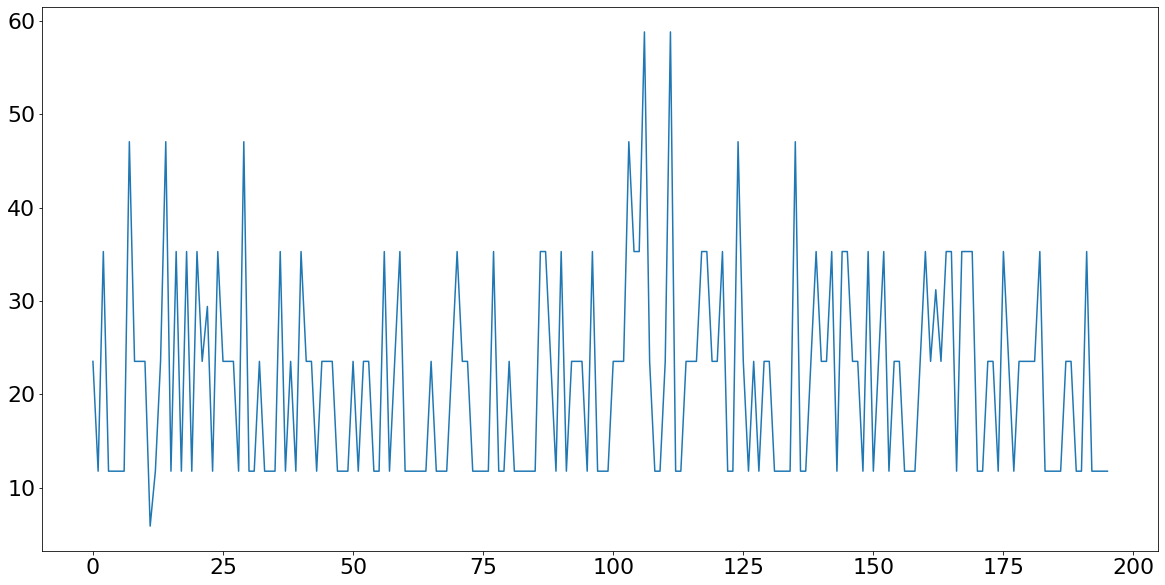

In [10]:
plt.plot(range(len(rates)), rates)

print(np.mean(rates), "+-", np.sqrt(np.sum(np.array(sigma_rates)**2)))